# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'F:\Thapar\Semester 5\Projects\Plant_Disease\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 2246 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two

# Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [5]:
import matplotlib.pyplot as plt

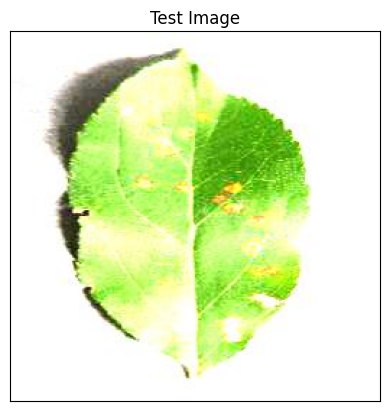

In [6]:
#Test Image Visualization
import cv2
image_path = image_path = 'F:\\Thapar\\Semester 5\\Projects\\Plant_Disease\\Plant_Disease_Dataset\\test\\test\\AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


In [8]:
print(predictions)

[[1.21465931e-03 1.48573788e-04 2.37211853e-01 1.44240028e-06
  1.07527856e-04 5.60936023e-05 1.83091817e-08 1.00975949e-03
  5.16798423e-07 5.33427374e-06 1.25714308e-07 1.94351058e-04
  1.58141802e-06 3.62199280e-05 7.70126499e-05 9.98767609e-06
  3.59561847e-04 1.75914829e-05 9.03559485e-05 5.59538603e-04
  3.56725923e-06 2.33379469e-04 4.54090070e-07 4.29524662e-05
  2.33546409e-08 1.31027537e-06 1.84388366e-04 2.32480481e-04
  3.44030588e-04 7.28587925e-01 1.06830718e-02 6.17961268e-05
  1.61595773e-02 1.06043575e-04 8.00225389e-05 4.40053060e-04
  1.72601279e-03 1.07793940e-05]]


In [9]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


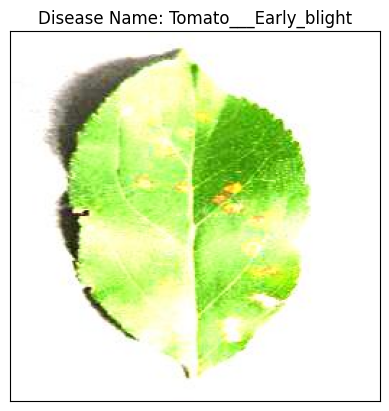

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()